# Sleep_health_and_lifestyle_dataset



In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
ruta = "/content/drive/My Drive/Datasets/Sleep_health_and_lifestyle_dataset.csv"
dataset= pd.read_csv(ruta)

Mounted at /content/drive


##Análisis exploratorio

In [ ]:
dataset.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
dataset.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


Correlación entre atributos

In [ ]:
from scipy.stats import chi2_contingency
def cramers_v(x, y):
    matriz_contingencia = pd.crosstab(x, y)

    chi2 = chi2_contingency(matriz_contingencia)[0]
    n = matriz_contingencia.sum().sum()
    return np.sqrt(chi2 / (n * (min(matriz_contingencia.shape) - 1)))

In [ ]:
def cramers_v_matrix(df):
    cols = df.columns
    matrix = pd.DataFrame(index=cols, columns=cols)
    for col1 in cols:
        for col2 in cols:
            matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])
    return matrix.astype(float)

In [ ]:
numericas = dataset.select_dtypes(include=['float64', 'int64']).columns
categoricas = dataset.select_dtypes(include=['object']).columns


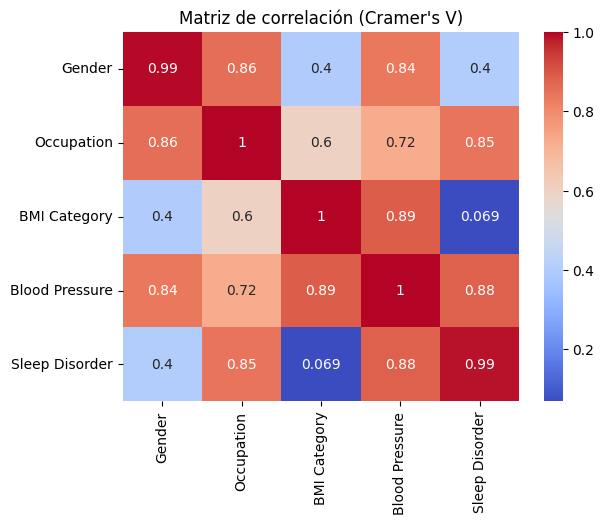

In [ ]:
matrizCramer = cramers_v_matrix(dataset[categoricas])
sns.heatmap(matrizCramer, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación (Cramer's V)")
plt.show()

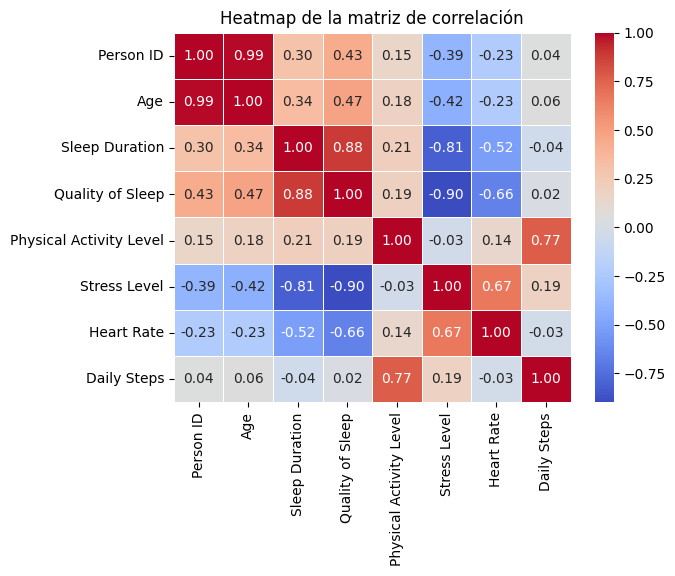

In [ ]:
correlation = dataset.corr(numeric_only = True)
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Heatmap de la matriz de correlación')

plt.show()

## Relación de la calidad de sueño con la actividad física


In [ ]:
print('Quality of Sleep: ', dataset['Quality of Sleep'].unique())
print('Physical Activity Level: ', dataset['Physical Activity Level'].unique())
print('Daily Steps: ', dataset['Daily Steps'].unique())
print('BMI Category: ', dataset['BMI Category'].unique())
print('Heart Rate: ', dataset['Heart Rate'].unique())

Quality of Sleep:  [6 4 7 5 8 9]
Physical Activity Level:  [42 60 30 40 75 35 45 50 32 70 80 55 90 47 65 85]
Daily Steps:  [ 4200 10000  3000  3500  8000  4000  4100  6800  5000  7000  5500  5200
  5600  3300  4800  7500  7300  6200  6000  3700]
BMI Category:  ['Overweight' 'Normal' 'Obese' 'Normal Weight']
Heart Rate:  [77 75 85 82 70 80 78 69 72 68 76 81 65 84 74 67 73 83 86]


In [ ]:
nvlBMI = {'Obese':1,'Overweight': 2, 'Normal': 3, 'Normal Weight':3}
dataset['BMI_Number'] = dataset['BMI Category'].map(nvlBMI)
dataset

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,BMI_Number
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,2
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,3
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,3
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,1
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,2
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,2
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,2
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,2


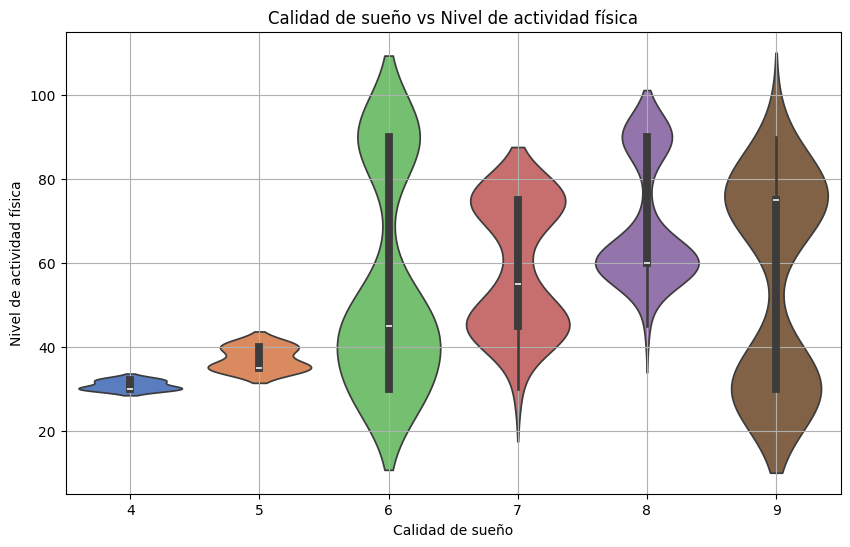

In [ ]:
# Calidad de sueño vs Nivel de actividad física
plt.figure(figsize=(10, 6))
sns.violinplot(
    x='Quality of Sleep',
    y='Physical Activity Level',
    hue='Quality of Sleep',
    data=dataset,
    palette='muted',
    density_norm='count',
    legend=False
)

plt.title("Calidad de sueño vs Nivel de actividad física")
plt.xlabel("Calidad de sueño")
plt.ylabel("Nivel de actividad física")
plt.grid(True)
plt.show()



*   Se puede ver que las personas que tienen una calidad de sueño inferior son aquellas que su nivel de actividad física es mínima
*   También se observa que las personas con calidad de sueño superiores tienen en su mayoría un mayor nivel de actividad física, con algunas excepciones. Su alta calidad de sueño en estos casos se le atribuye a otros factores.



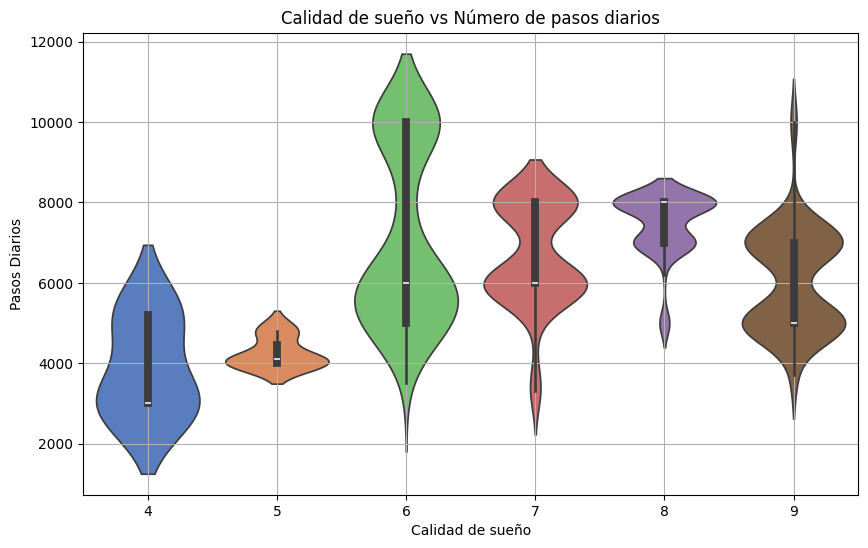

In [ ]:
# Calidad de sueño vs Número de pasos diarios
plt.figure(figsize=(10, 6))
sns.violinplot(
    x='Quality of Sleep',
    y='Daily Steps',
    hue='Quality of Sleep',
    data=dataset,
    palette='muted',
    density_norm='count' ,
    legend=False
)

plt.title("Calidad de sueño vs Número de pasos diarios")
plt.xlabel("Calidad de sueño")
plt.ylabel("Pasos Diarios")
plt.grid(True)
plt.show()



*   Similar a la gráfica anterior, las personas que tienen la menor calidad de sueño son las que menos pasos dan al día



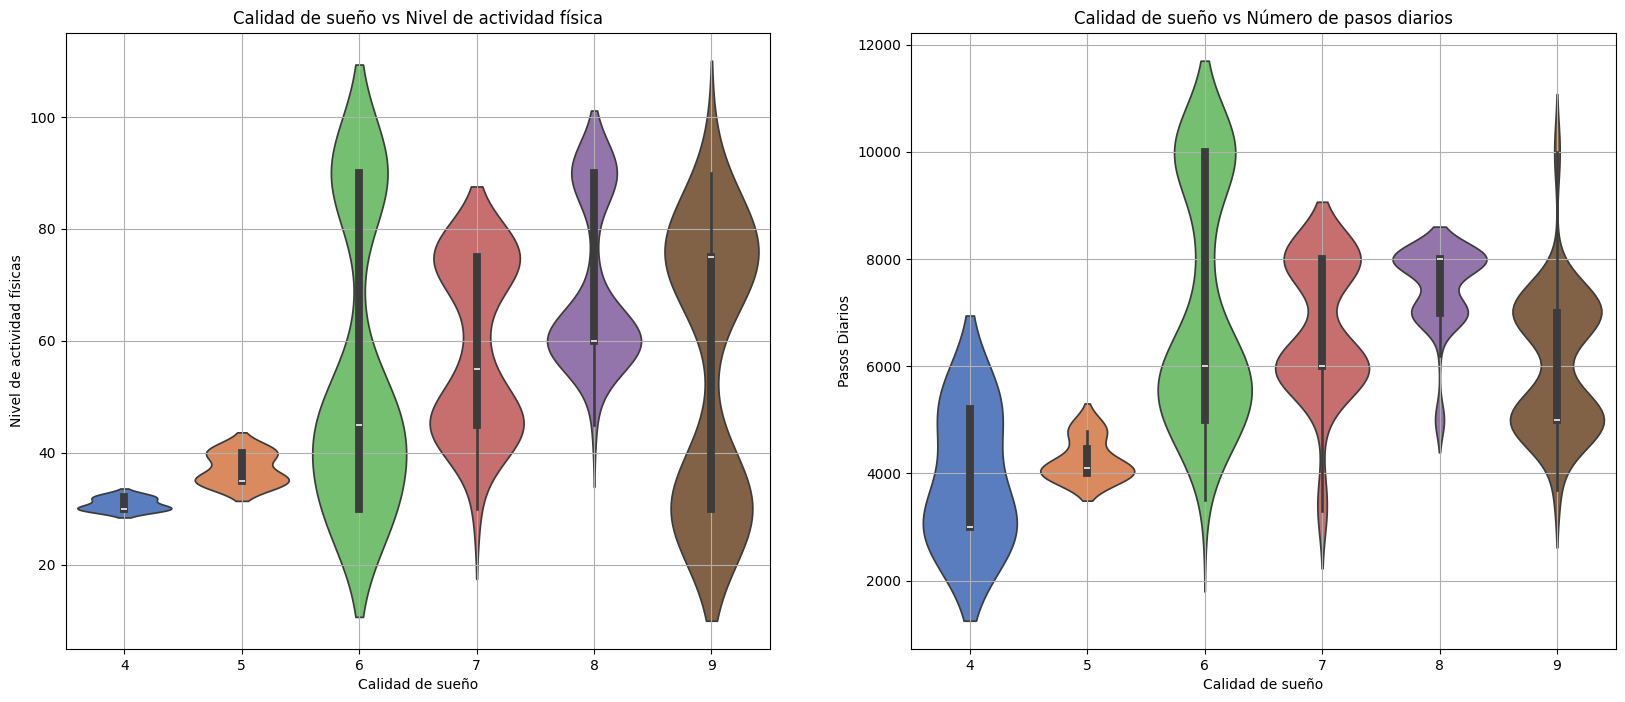

In [ ]:
# Comparación Calidad de sueño vs Nivel de actividad física y Calidad de sueño vs Número de pasos diarios
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

sns.violinplot(
    x='Quality of Sleep',
    y='Physical Activity Level',
    hue='Quality of Sleep',
    data=dataset,
    palette='muted',
    density_norm='count',
    legend=False ,
    ax=axs[0]
)
axs[0].set_title("Calidad de sueño vs Nivel de actividad física")
axs[0].set_xlabel("Calidad de sueño")
axs[0].set_ylabel("Nivel de actividad físicas")
axs[0].grid()


sns.violinplot(
    x='Quality of Sleep',
    y='Daily Steps',
    hue='Quality of Sleep',
    data=dataset,
    palette='muted',
    density_norm='count' ,
    legend=False ,
    ax=axs[1]
)

axs[1].set_title("Calidad de sueño vs Número de pasos diarios")
axs[1].set_xlabel("Calidad de sueño")
axs[1].set_ylabel("Pasos Diarios")
axs[1].grid()
plt.show()

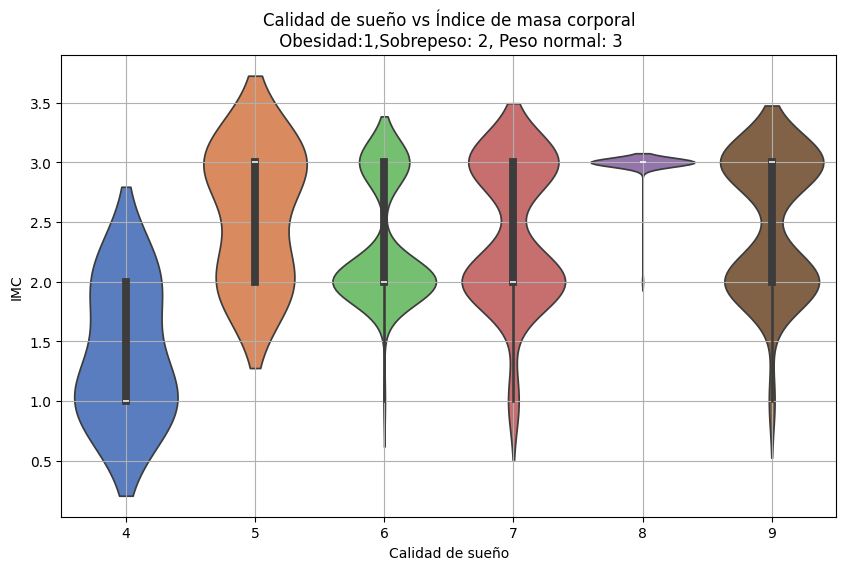

In [ ]:
# Calidad de sueño vs IMC
plt.figure(figsize=(10, 6))
sns.violinplot(
    x='Quality of Sleep',
    y='BMI_Number',
    hue='Quality of Sleep',
    data=dataset,
    palette='muted',
    density_norm='count' ,
    legend=False
)

plt.title("Calidad de sueño vs Índice de masa corporal\n Obesidad:1,Sobrepeso: 2, Peso normal: 3")
plt.xlabel("Calidad de sueño")
plt.ylabel("IMC")
plt.grid(True)
plt.show()

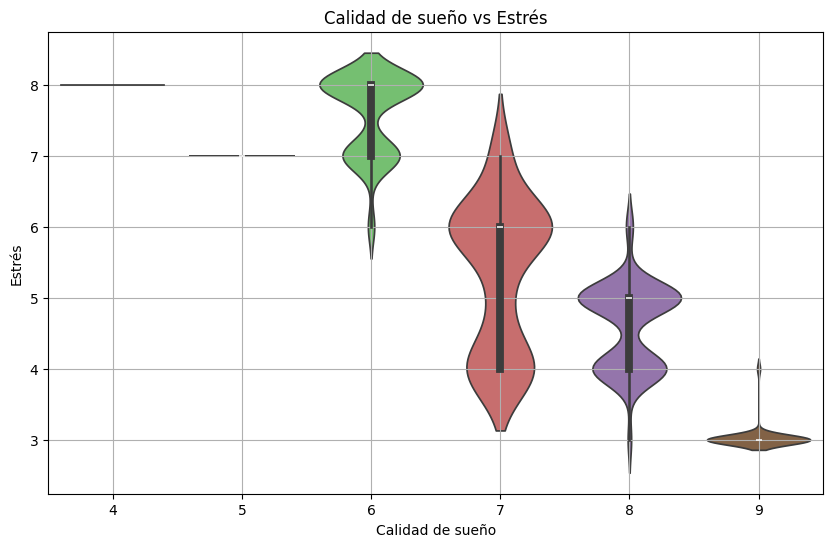

In [ ]:
# Calidad de sueño vs Estrés
plt.figure(figsize=(10, 6))
sns.violinplot(
    x='Quality of Sleep',
    y='Stress Level',
    hue='Quality of Sleep',
    data=dataset,
    palette='muted',
    density_norm='count',
    legend=False
)

plt.title("Calidad de sueño vs Estrés")
plt.xlabel("Calidad de sueño")
plt.ylabel("Estrés")
plt.grid(True)
plt.show()

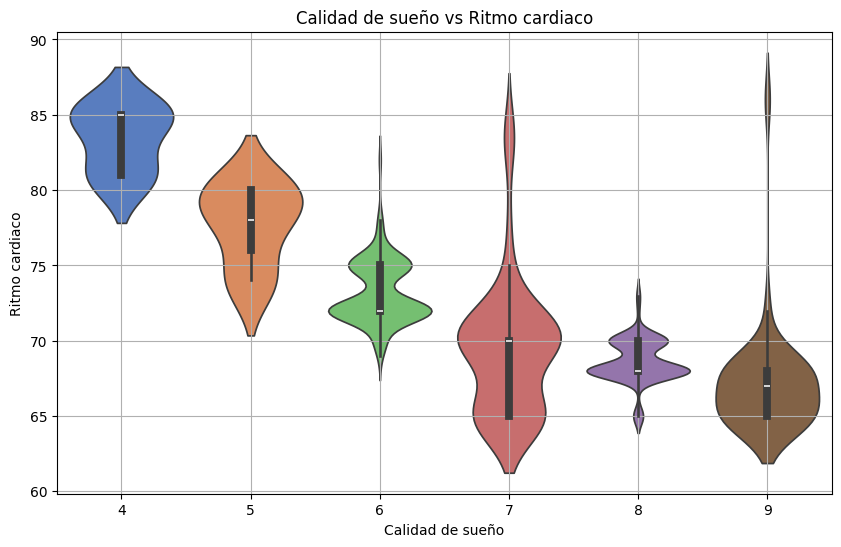

In [ ]:
# Calidad de sueño vs Ritmo Cardiaco
plt.figure(figsize=(10, 6))
sns.violinplot(
    x='Quality of Sleep',
    y='Heart Rate',
    hue='Quality of Sleep',
    data=dataset,
    palette='muted',
    density_norm='count',
    legend=False
)

plt.title("Calidad de sueño vs Ritmo cardiaco")
plt.xlabel("Calidad de sueño")
plt.ylabel("Ritmo cardiaco")
plt.grid(True)
plt.show()



*   Mientras más elevado es el ritmo cardiaco, peor es la calidad de sueño.
    Esto se le puede atribuír al estrés y su relación directamente proporcional con el ritmo cardiaco.



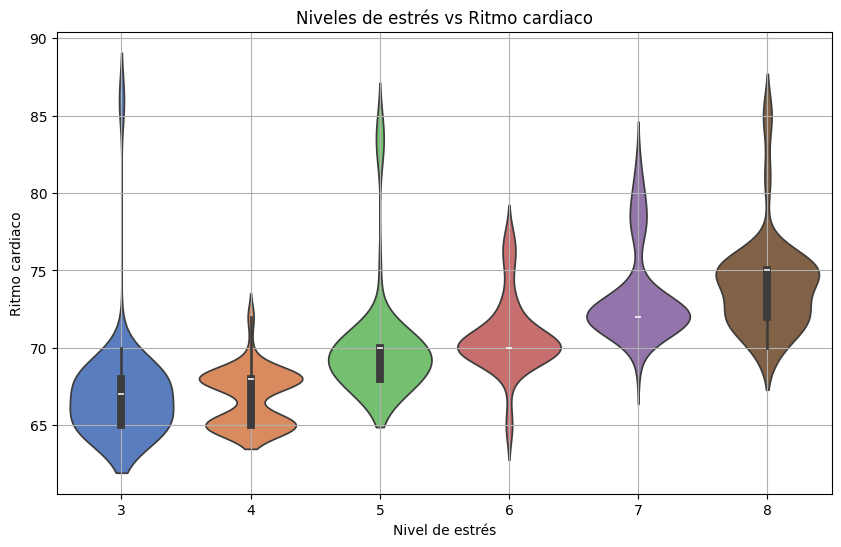

In [ ]:
# Estrés vs Ritmo Cardiaco (ESTA ES UNA GRÁFICA QUE HICE PARA VER (NO ME TOCABA A MI))
# Solo es para mostrar que el ritmo cardiaco viene del estrés
plt.figure(figsize=(10, 6))
sns.violinplot(
    x='Stress Level',
    y='Heart Rate',
    hue='Stress Level',
    data=dataset,
    palette='muted',
    density_norm='count',
    legend=False
)

plt.title("Niveles de estrés vs Ritmo cardiaco")
plt.xlabel("Nivel de estrés")
plt.ylabel("Ritmo cardiaco")
plt.grid(True)
plt.show()

In [ ]:
color = {4: 'red', 5: 'orange', 6: 'yellow', 7: 'green', 8: 'blue', 9: 'purple'}
dataset['Color'] = dataset['Quality of Sleep'].map(color)

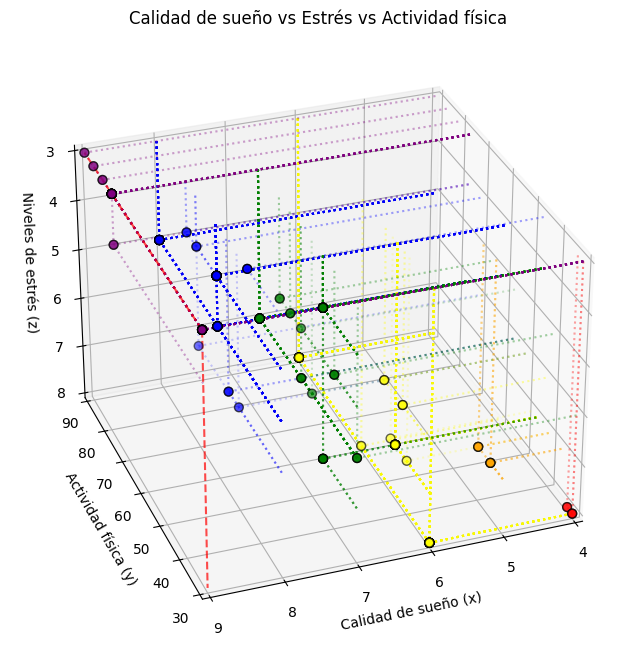

In [ ]:
# Calidad de sueño vs Estrés vs Actividad física
# (para explicar las personas con baja actividad física pero buena calidad de sueño gracias a un nivel bajo de estrés)

f1 = 5  # Calidad de sueño
f2 = 6  # Actividad física
f3 = 7  # Niveles de estrés

x_min, x_max = 4, 9
y_min, y_max = 30, 90
z_min, z_max = 3, 8

fig = plt.figure(1, figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)


ax.scatter(
    dataset.iloc[:, f1],
    dataset.iloc[:, f2],
    dataset.iloc[:, f3],
    c=dataset['Color'],
    s=40,
    edgecolor='k'
)

for i in range(len(dataset)):
    x = dataset.iloc[i, f1]
    y = dataset.iloc[i, f2]
    z = dataset.iloc[i, f3]

    # Plano XY (restringida en Z)
    if z_min <= z <= z_max:
        ax.plot([x, x], [y, y], [z_min, z], linestyle='dotted', color=dataset.loc[i,'Color'], alpha=0.2)
    # Plano XZ (restringida en Y)
    if y_min <= y <= y_max:
        ax.plot([x, x], [y_min, y], [z, z], linestyle='dotted', color=dataset.loc[i,'Color'], alpha=0.2)
    # Plano YZ (restringida en X)
    if x_min <= x <= x_max:
        ax.plot([x_min, x], [y, y], [z, z], linestyle='dotted', color=dataset.loc[i,'Color'], alpha=0.2)

#ax.plot([4, 9], [30, 30], [3, 3], linestyle='dashed', color='red', alpha=0.7)
ax.plot([9, 9], [30, 90], [3, 3], linestyle='dashed', color='red', alpha=0.7)
ax.plot([9, 9], [30, 30], [3, 8], linestyle='dashed', color='red', alpha=0.7)

ax.set_xlim(4, 9)  # Calidad de sueño
ax.set_ylim(30, 90)  # Actividad física
ax.set_zlim(3, 8)  # Niveles de estrés


ax.set_title('Calidad de sueño vs Estrés vs Actividad física')
ax.set_xlabel('Calidad de sueño (x)')
ax.set_ylabel('Actividad física (y)')
ax.set_zlabel('Niveles de estrés (z)')

plt.show()


Aquí se puede apreciar como las personas con la mayor calidad de sueño tienen tanto niveles de estrés bajos mínimos, como el mayor número de actividad física.
El caso opuesto se da con las personas con la peor calidad de sueño de todas.
Sin embargo se pueden ver algunas excepciones en las personas con la mayor calidad de sueño pero con la menor cantidad de actividad física, esto es debido a sus niveles de estrés mínimos. Se puede concluir que el nivel de estrés tiene una mayor influencia en la calidad de sueño que la actividad física.

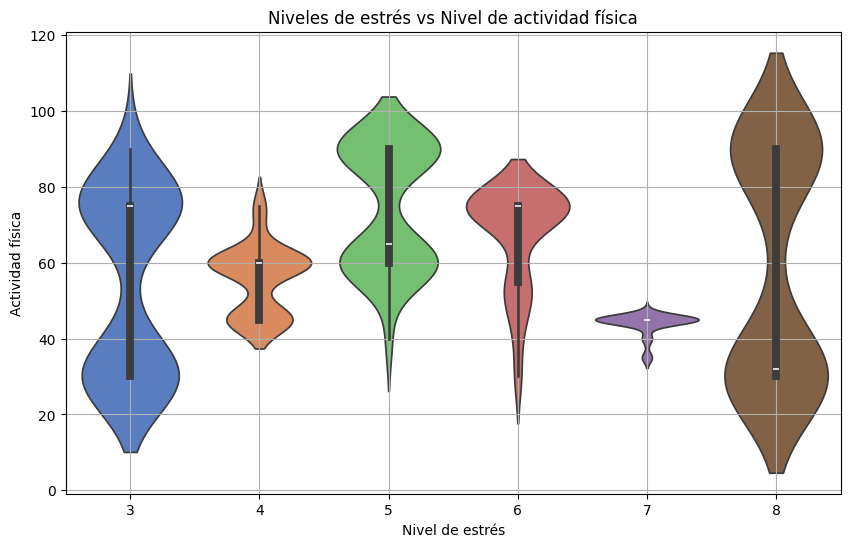

In [ ]:
# Niveles de actividad física vs Niveles de estrés

plt.figure(figsize=(10, 6))
sns.violinplot(
    x='Stress Level',
    y='Physical Activity Level',
    hue='Stress Level',
    data=dataset,
    palette='muted',
    density_norm='count',
    legend=False
)

plt.title("Niveles de estrés vs Nivel de actividad física")
plt.xlabel("Nivel de estrés")
plt.ylabel("Actividad física")
plt.grid(True)
plt.show()

Se sabe que en cierto nivel el ejercicio disminuye los niveles de estrés, sin embargo aquí se puede observar que si bien esta relación existe, no es tan precisa

## Calidad de sueño comparada por estrés, profesiones y género

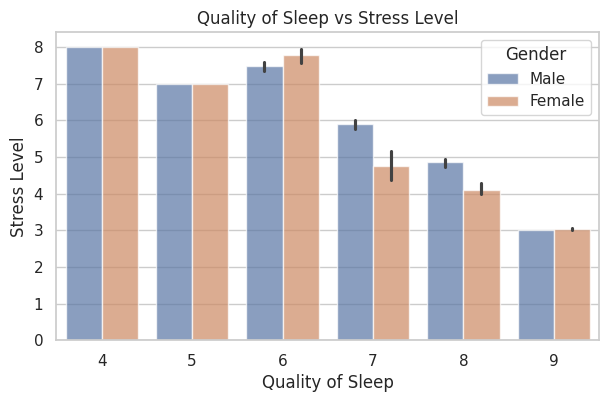

In [ ]:
import seaborn as sns

# Configurar estilo de Seaborn
sns.set(style='whitegrid')

# Quality of Sleep vs Stress Level
plt.figure(figsize=(7, 4))
sns.barplot(data=dataset, x='Quality of Sleep', y='Stress Level', hue='Gender', alpha=0.7)
plt.title('Quality of Sleep vs Stress Level')
plt.xlabel('Quality of Sleep')
plt.ylabel('Stress Level')
plt.legend(title='Gender')
plt.show()

Podemos observar como la calidad de sueño tiende a mejorar conforme el nivel de estrés va disminuyendo. Si bien existen otros factores que determinan la calidad de sueño, el estrés es uno de los más importantes.

<ipython-input-6-7b23625fe5db>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dataset, x='Quality of Sleep', y='Occupation', palette='muted')


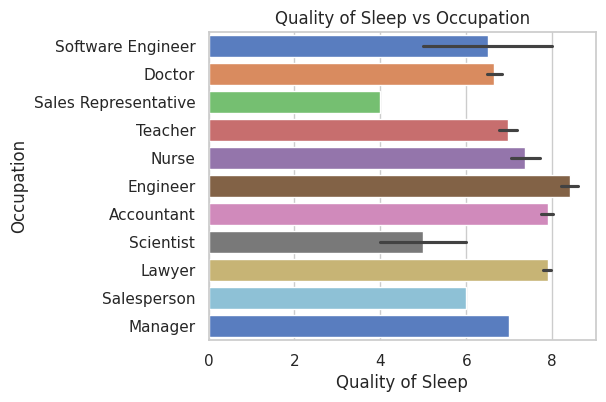

In [ ]:
# Quality of Sleep vs Occupation
plt.figure(figsize=(5, 4))
sns.barplot(data=dataset, x='Quality of Sleep', y='Occupation', palette='muted')
plt.title('Quality of Sleep vs Occupation')
plt.xlabel('Quality of Sleep')
plt.ylabel('Occupation')
plt.show()

En esta gráfica podemos apreciar la calidad de sueño dependiendo de los diferentes roles con los que cuenta el dataset. Podemos ver que profesiones como Representante de Ventas y Científico son aquellas que cuentan con peor calidad de sueño, esto podría deberse los roles especifícos por profesión que no son mostrados en el dataset original. Mientas que Ingenieros (tampoco especifícado de que área), contadores y abogados son los que mejor duermen.

<ipython-input-21-6f59ad5147fc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=dataset, x='Gender', y='Quality of Sleep', palette='muted', ax=axs[0])


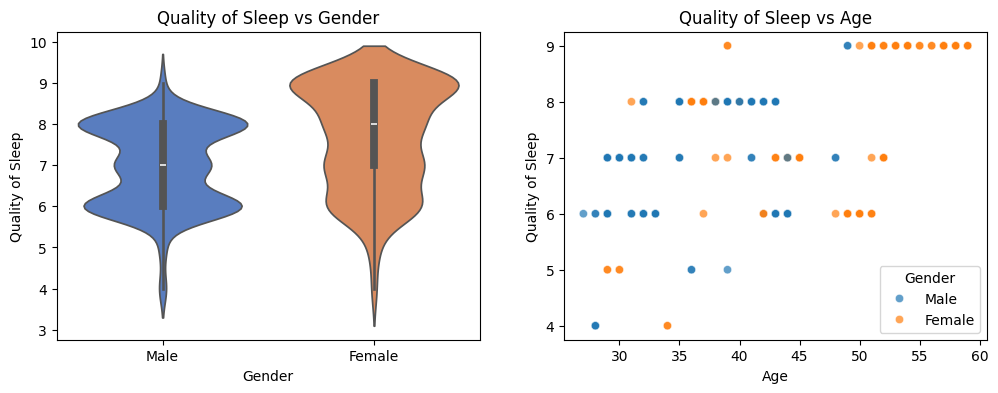

<Figure size 700x400 with 0 Axes>

<Figure size 700x400 with 0 Axes>

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Quality of Sleep vs Gender
plt.figure(figsize=(7, 4))
sns.violinplot(data=dataset, x='Gender', y='Quality of Sleep', palette='muted', ax=axs[0])
axs[0].set_title('Quality of Sleep vs Gender')
axs[0].set_xlabel('Gender')
axs[0].set_ylabel('Quality of Sleep')

plt.figure(figsize=(7,4))
sns.scatterplot(data=dataset, x='Age', y='Quality of Sleep', hue='Gender', alpha=0.7, ax=axs[1])
axs[1].set_title('Quality of Sleep vs Age')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Quality of Sleep')
axs[1].legend(title='Gender')

plt.show()

Tendencia en la Calidad de Sueño Según Género y Edad

En esta visualización podemos notar una tendencia en la que las mujeres tienden a tener una ligera mejor calidad de sueño, especialmente en edades más avanzadas. Mientras que los hombres experimentan una buena calidad de sueño al entrar en la mediana edad, las mujeres muestran una alta volatilidad en la calidad de su sueño hasta ese punto. Sin embargo, una vez alcanzada la adultez mayor, la calidad de sueño de las mujeres mejora significativamente. Esta tendencia podría explicarse por diversos factores:

Estilo de vida
Periodos de empleo y edad de retiro
Factores psicológicos
Salud general

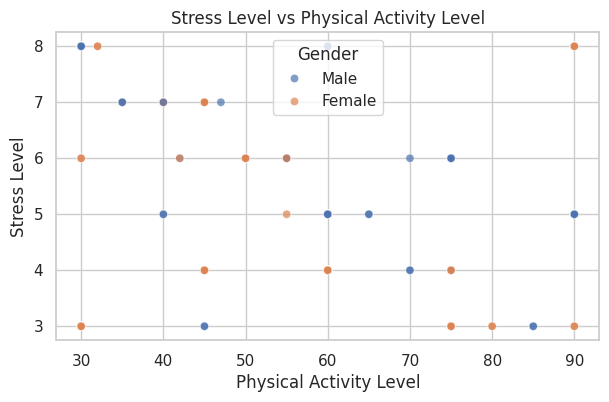

In [ ]:
# Stress Level vs Physical Activity Level
plt.figure(figsize=(7, 4))
sns.scatterplot(data=dataset, x='Physical Activity Level', y='Stress Level', hue='Gender', alpha=0.7)
plt.title('Stress Level vs Physical Activity Level')
plt.xlabel('Physical Activity Level')
plt.ylabel('Stress Level')
plt.legend(title='Gender')
plt.show()

Se observa como existe una relación directamente proporcional entre el nivel de estrés y la cantidad de actividad física realizada.
"De acuerdo con la Organización Mundial de la Salud (OMS), los adultos de 18 a 64 años deben realizar al menos 150 minutos de actividad física aeróbica moderada o 75 minutos de actividad física aeróbica vigorosa por semana."

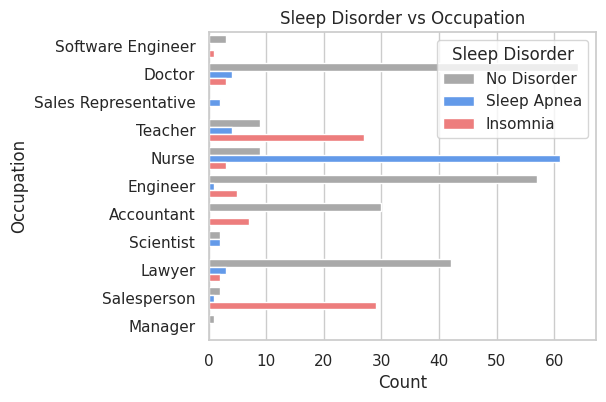

In [ ]:
dataset_disorder = dataset.copy()
dataset_disorder = dataset_disorder.fillna("No Disorder")


custom_palette = ['#A9A9A9', '#4D96FF', '#FF6B6B']
plt.figure(figsize=(5,4))
sns.countplot(data=dataset_disorder, y='Occupation', hue='Sleep Disorder', palette=custom_palette)
plt.title('Sleep Disorder vs Occupation')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.legend(title='Sleep Disorder')
plt.show()

En esta gráfica podemos ver claros los diferentes tipos de trastornos del sueño. Llama la atención la cantidad de enfermeras con Apena del sueño, se puede relacionar directamente con el nivel de estrés elevado inherente a su profesión, así mismo como los factores generales que causan la apnea del sueño, como lo es que sea más propenso en mujeres.

In [ ]:
bins = [20, 30, 40, 50, 60]
labels = ['20\'s', '30\'s', '40\'s', '50\'s']
dataset['Age'] = pd.cut(dataset['Age'], bins=bins, labels=labels)

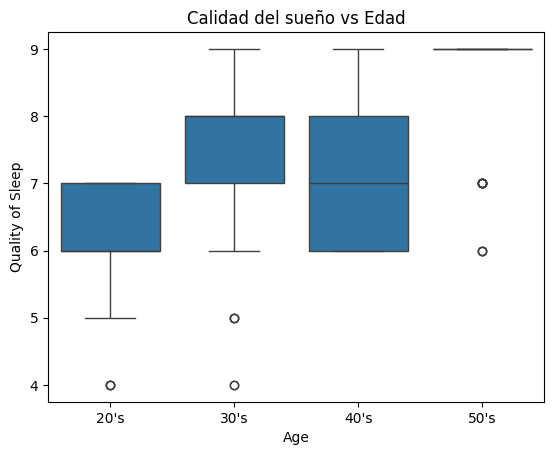

In [ ]:
# Boxplot
sns.boxplot(data=dataset, x='Age', y='Quality of Sleep')
plt.title('Calidad del sueño vs Edad')
plt.show()



*   Los niveles de estrés son más altos y menos variables en los 20s, posiblemente debido a la transición a la vida adulta, la presión académica o profesional.
*   En los 30s y 40s, la variabilidad sugiere que algunos individuos logran manejar mejor el estrés, mientras que otros pueden tener picos más altos.
* A partir de los 50s, parece haber una reducción significativa en el estrés general, lo que podría deberse a cambios en el estilo de vida, la jubilación o una mayor estabilidad emocional.



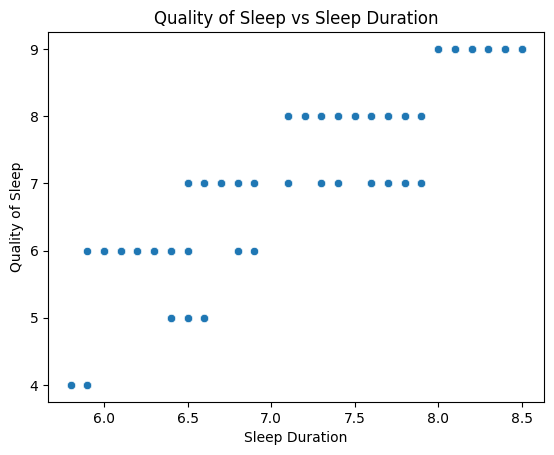

In [ ]:
sns.scatterplot(data=dataset, x='Sleep Duration', y='Quality of Sleep')
plt.title('Calidad del sueño vs Duración del sueño')
plt.show()



Duración óptima del sueño:

* Las personas que duermen entre 7.5 y 8.5 horas tienden a reportar una calidad de sueño alta.
Esto refuerza la idea de que una duración adecuada del sueño está vinculada con una mejor calidad del descanso.

Impacto del sueño insuficiente:

* Dormir menos de 7 horas parece estar relacionado con una calidad de sueño significativamente menor, lo que podría sugerir un sueño insuficiente o menos reparador.

Puntos para analizar más:

* La relación no es perfecta; algunas personas con 6 horas de sueño reportan calidades aceptables (~6-7), lo que podría deberse a otros factores (como hábitos, estrés o salud física).

In [ ]:
dataset[['Systolic', 'Diastolic']] = dataset['Blood Pressure'].str.split('/', expand=True)
dataset['Systolic'] = pd.to_numeric(dataset['Systolic'], errors='coerce')
dataset['Diastolic'] = pd.to_numeric(dataset['Diastolic'], errors='coerce')

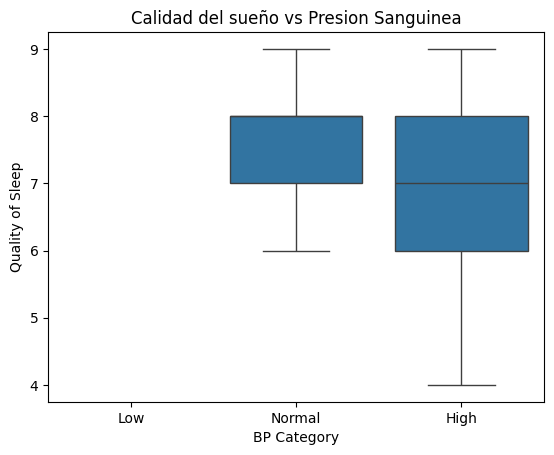

In [ ]:
bins = [0, 80, 120, 180]
labels = ['Low', 'Normal', 'High']
dataset['BP Category'] = pd.cut(dataset['Systolic'], bins=bins, labels=labels)
sns.boxplot(data=dataset, x='BP Category', y='Quality of Sleep')
plt.title('Calidad del sueño vs Presion Sanguinea')
plt.show()

In [ ]:
correlation = dataset['Quality of Sleep'].corr(dataset['Systolic'])
correlation

-0.12163199613350788

In [ ]:
correlation = dataset['Quality of Sleep'].corr(dataset['Diastolic'])
correlation

-0.11015092719366507

Concluimos que la calidad del sueño no se ve afectada por la presion sanguinea.

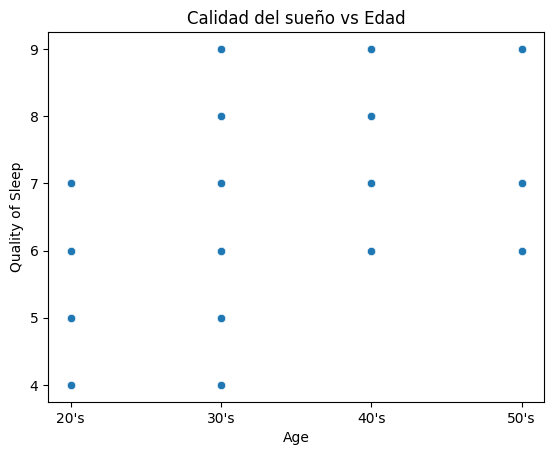

In [ ]:
sns.scatterplot(data=dataset, x='Age', y='Quality of Sleep')
plt.title('Calidad del sueño vs Edad')
plt.show()

Podemos observar como la edad afecta la calidad del sueño, en los 20's la calidad del seuño es muy baja entre los 30's y 40's aumenta y se estabiliza alrededor de los 50's